In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [2]:
resolution = [0., 0.25, 0.50, 0.75]


#-- Data (true) 10k, MC (train) 100k

err_ratio_mean_simple = [1.00, 1.03, 1.18, 1.29]
err_ratio_mean_nn     = [1.26, 1.24, 1.36, 1.45]

err_ratio_err = [0.03, 0.03, 0.04, 0.04]

err_ratio_cov_simple = [1.03, 1.09, 1.24, 1.42]
err_ratio_cov_nn     = [1.21, 1.23, 1.41, 1.62]




#-- Data (true) 100k, MC (train) 1M

err_ratio2_mean_simple = [0.99, 1.03, 1.13, 1.28]
err_ratio2_mean_nn     = [1.27, 1.26, 1.31, 1.43]

err_ratio2_err = [0.03, 0.03, 0.04, 0.04]

err_ratio2_cov_simple = [1.00, 1.04, 1.24, 1.42]
err_ratio2_cov_nn     = [1.16, 1.28, 1.60, 1.73]

err_ratio2b_err = [0.04, 0.04, 0.04, 0.05]



(0.9, 1.9)

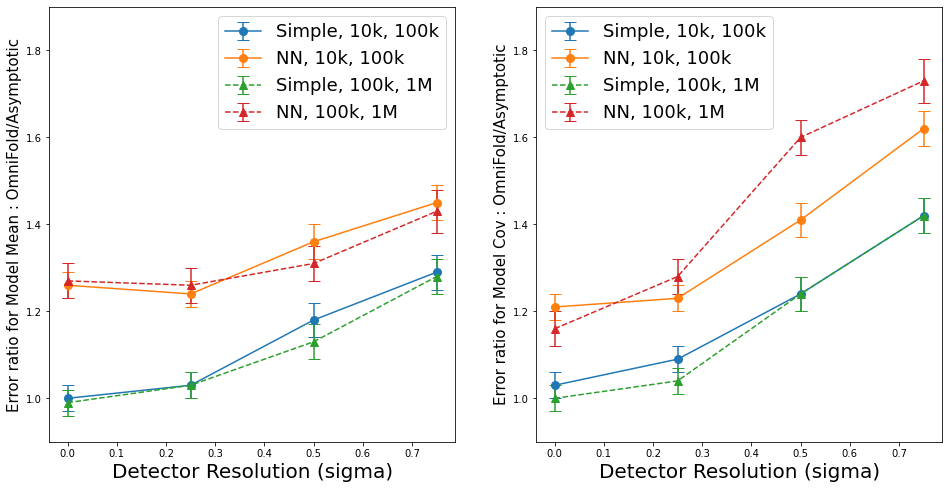

In [3]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))

ax[0].errorbar(resolution, err_ratio_mean_simple, err_ratio_err, marker='o', label='Simple, 10k, 100k',
              capsize=6, markersize=8 )
ax[0].errorbar(resolution, err_ratio_mean_nn, err_ratio_err, marker='o', label='NN, 10k, 100k',
              capsize=6, markersize=8 )
ax[0].errorbar(resolution, err_ratio2_mean_simple, err_ratio2_err, marker='^', label='Simple, 100k, 1M',
               linestyle='--', capsize=6, markersize=8)
ax[0].errorbar(resolution, err_ratio2_mean_nn, err_ratio2b_err, marker='^', label='NN, 100k, 1M', 
               linestyle='--', capsize=6, markersize=8)


ax[1].errorbar(resolution, err_ratio_cov_simple, err_ratio_err, marker='o', label='Simple, 10k, 100k',
              capsize=6, markersize=8 )
ax[1].errorbar(resolution, err_ratio_cov_nn, err_ratio_err, marker='o', label='NN, 10k, 100k',
              capsize=6, markersize=8 )
ax[1].errorbar(resolution, err_ratio2_cov_simple, err_ratio2_err, marker='^', label='Simple, 100k, 1M', 
               linestyle='--', capsize=6, markersize=8)
ax[1].errorbar(resolution, err_ratio2_cov_nn, err_ratio2b_err, marker='^', label='NN, 100k, 1M', 
               linestyle='--', capsize=6, markersize=8)



ax[0].legend( fontsize=18, loc='best')
ax[1].legend( fontsize=18, loc='best')

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_ylabel('Error ratio for Model Mean : OmniFold/Asymptotic', fontsize=15)
ax[1].set_ylabel('Error ratio for Model Cov : OmniFold/Asymptotic', fontsize=15)

ax[0].set_ylim([0.9,1.9])
ax[1].set_ylim([0.9,1.9])


In [16]:
n_res = 4

n_type = 6

n_unfold_type = 2


marker_styles = ['o','o','o','^','^','^']


type_name = ['RMS unbinned ML fit',
             'RMS chi2 fit, full cov.',
             'RMS chi2 fit, diag. cov.',
             'Ave unbinned ML fit err.',
             'Ave chi2 fit err., full cov.',
             'Ave chi2 fit err., diag. cov.'
            ]


all_err_mean = np.zeros( shape=(n_res, n_type, n_unfold_type))



##--- Simple PDF (ufi=0), error type = RMS unbinned ML fit (ti=0) 
ti = 0
ufi = 0
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0093
all_err_mean[2,ti,ufi] = 0.0107
all_err_mean[3,ti,ufi] = 0.0118


##--- Simple PDF (ufi=0), error type = RMS chi2 fit, full cov. (ti=1) 
ti = 1
ufi = 0
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0093
all_err_mean[2,ti,ufi] = 0.0104
all_err_mean[3,ti,ufi] = 0.0117


##--- Simple PDF (ufi=0), error type = RMS chi2 fit, diag cov. (ti=2) 
ti = 2
ufi = 0
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0093
all_err_mean[2,ti,ufi] = 0.0104
all_err_mean[3,ti,ufi] = 0.0117


##--- Simple PDF (ufi=0), error type = Ave unbinned ML fit (ti=3) 
ti = 3
ufi = 0
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0090
all_err_mean[2,ti,ufi] = 0.0090
all_err_mean[3,ti,ufi] = 0.0092


##--- Simple PDF (ufi=0), error type = Ave chi2 fit, full cov (ti=4) 
ti = 4
ufi = 0
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0093
all_err_mean[2,ti,ufi] = 0.0104
all_err_mean[3,ti,ufi] = 0.0117


##--- Simple PDF (ufi=0), error type = Ave chi2 fit, diag cov (ti=5) 
ti = 5
ufi = 0
all_err_mean[0,ti,ufi] = 0.0066
all_err_mean[1,ti,ufi] = 0.0066
all_err_mean[2,ti,ufi] = 0.0060
all_err_mean[3,ti,ufi] = 0.0053











In [22]:
all_err_sig2 = np.zeros( shape=(n_res, n_type, n_unfold_type))



##--- Simple PDF (ufi=0), error type = RMS unbinned ML fit (ti=0) 
ti = 0
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0117
all_err_sig2[1,ti,ufi] = 0.0125
all_err_sig2[2,ti,ufi] = 0.0143
all_err_sig2[3,ti,ufi] = 0.0169


##--- Simple PDF (ufi=0), error type = RMS chi2 fit, full cov. (ti=1) 
ti = 1
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0127
all_err_sig2[1,ti,ufi] = 0.0134
all_err_sig2[2,ti,ufi] = 0.0174
all_err_sig2[3,ti,ufi] = 0.0201


##--- Simple PDF (ufi=0), error type = RMS chi2 fit, diag cov. (ti=2) 
ti = 2
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0119
all_err_sig2[1,ti,ufi] = 0.0129
all_err_sig2[2,ti,ufi] = 0.0150
all_err_sig2[3,ti,ufi] = 0.0173


##--- Simple PDF (ufi=0), error type = Ave unbinned ML fit (ti=3) 
ti = 3
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0115
all_err_sig2[1,ti,ufi] = 0.0115
all_err_sig2[2,ti,ufi] = 0.0115
all_err_sig2[3,ti,ufi] = 0.0119


##--- Simple PDF (ufi=0), error type = Ave chi2 fit, full cov (ti=4) 
ti = 4
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0128
all_err_sig2[1,ti,ufi] = 0.0135
all_err_sig2[2,ti,ufi] = 0.0167
all_err_sig2[3,ti,ufi] = 0.0199


##--- Simple PDF (ufi=0), error type = Ave chi2 fit, diag cov (ti=5) 
ti = 5
ufi = 0
all_err_sig2[0,ti,ufi] = 0.0087
all_err_sig2[1,ti,ufi] = 0.0087
all_err_sig2[2,ti,ufi] = 0.0080
all_err_sig2[3,ti,ufi] = 0.0072




<function matplotlib.pyplot.show(close=None, block=None)>

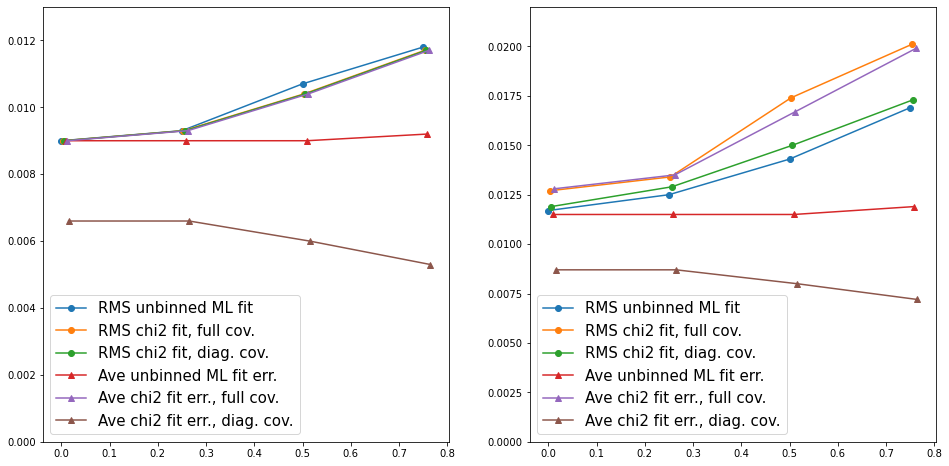

In [28]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))



ufi = 0

axi = ax[0]

for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_mean[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])

axi = ax[1]
    
for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_sig2[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])
    
    
ax[0].set_ylim([0.0,0.013])
ax[1].set_ylim([0.0,0.022])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

plt.show

In [29]:
##--- NN (ufi=1), error type = RMS unbinned ML fit (ti=0) 
ti = 0
ufi = 1
all_err_mean[0,ti,ufi] = 0.0113
all_err_mean[1,ti,ufi] = 0.0112
all_err_mean[2,ti,ufi] = 0.0122
all_err_mean[3,ti,ufi] = 0.0133


##--- NN (ufi=1), error type = RMS chi2 fit, full cov. (ti=1) 
ti = 1
ufi = 1
all_err_mean[0,ti,ufi] = 0.0113
all_err_mean[1,ti,ufi] = 0.0111
all_err_mean[2,ti,ufi] = 0.0121
all_err_mean[3,ti,ufi] = 0.0131


##--- NN (ufi=1), error type = RMS chi2 fit, diag cov. (ti=2) 
ti = 2
ufi = 1
all_err_mean[0,ti,ufi] = 0.0116
all_err_mean[1,ti,ufi] = 0.0119
all_err_mean[2,ti,ufi] = 0.0134
all_err_mean[3,ti,ufi] = 0.0141


##--- NN (ufi=1), error type = Ave unbinned ML fit (ti=3) 
ti = 3
ufi = 1
all_err_mean[0,ti,ufi] = 0.0090
all_err_mean[1,ti,ufi] = 0.0090
all_err_mean[2,ti,ufi] = 0.0090
all_err_mean[3,ti,ufi] = 0.0091


##--- NN (ufi=1), error type = Ave chi2 fit, full cov (ti=4) 
ti = 4
ufi = 1
all_err_mean[0,ti,ufi] = 0.0112
all_err_mean[1,ti,ufi] = 0.0111
all_err_mean[2,ti,ufi] = 0.0121
all_err_mean[3,ti,ufi] = 0.0131


##--- NN (ufi=1), error type = Ave chi2 fit, diag cov (ti=5) 
ti = 5
ufi = 1
all_err_mean[0,ti,ufi] = 0.0057
all_err_mean[1,ti,ufi] = 0.0060
all_err_mean[2,ti,ufi] = 0.0066
all_err_mean[3,ti,ufi] = 0.0071







<function matplotlib.pyplot.show(close=None, block=None)>

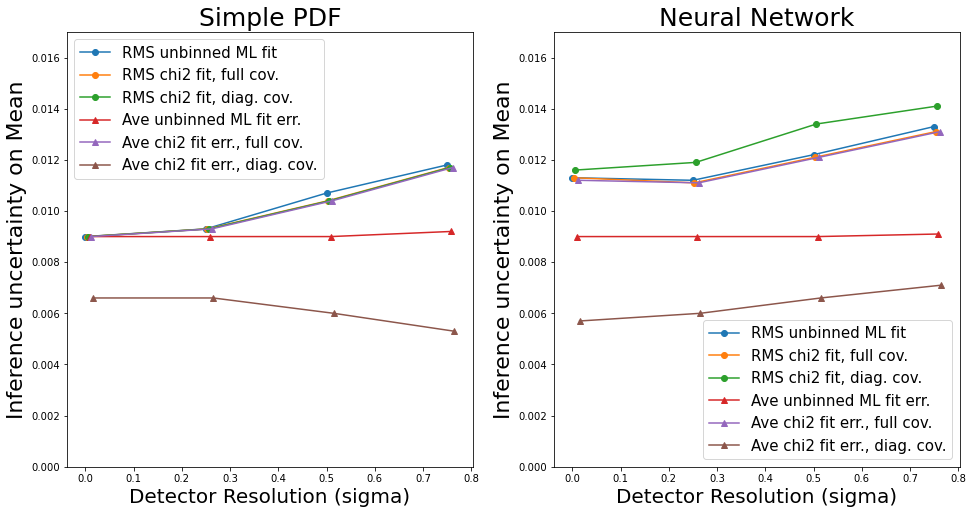

In [41]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))



ufi = 0

axi = ax[0]

for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_mean[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])


ufi = 1

axi = ax[1]

for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_mean[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])


ax[0].set_ylim([0.0,0.017])
ax[1].set_ylim([0.0,0.017])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)


ax[0].set_ylabel('Inference uncertainty on Mean', fontsize=22)
ax[1].set_ylabel('Inference uncertainty on Mean', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)

plt.show

In [33]:




##--- NN (ufi=1), error type = RMS unbinned ML fit (ti=0) 
ti = 0
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0139
all_err_sig2[1,ti,ufi] = 0.0142
all_err_sig2[2,ti,ufi] = 0.0162
all_err_sig2[3,ti,ufi] = 0.0191


##--- NN (ufi=1), error type = RMS chi2 fit, full cov. (ti=1) 
ti = 1
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0142
all_err_sig2[1,ti,ufi] = 0.0143
all_err_sig2[2,ti,ufi] = 0.0174
all_err_sig2[3,ti,ufi] = 0.0185


##--- NN (ufi=1), error type = RMS chi2 fit, diag cov. (ti=2) 
ti = 2
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0143
all_err_sig2[1,ti,ufi] = 0.0155
all_err_sig2[2,ti,ufi] = 0.0179
all_err_sig2[3,ti,ufi] = 0.0199


##--- NN (ufi=1), error type = Ave unbinned ML fit (ti=3) 
ti = 3
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0115
all_err_sig2[1,ti,ufi] = 0.0115
all_err_sig2[2,ti,ufi] = 0.0115
all_err_sig2[3,ti,ufi] = 0.0118


##--- NN (ufi=1), error type = Ave chi2 fit, full cov (ti=4) 
ti = 4
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0139
all_err_sig2[1,ti,ufi] = 0.0140
all_err_sig2[2,ti,ufi] = 0.0169
all_err_sig2[3,ti,ufi] = 0.0185


##--- NN (ufi=1), error type = Ave chi2 fit, diag cov (ti=5) 
ti = 5
ufi = 1
all_err_sig2[0,ti,ufi] = 0.0071
all_err_sig2[1,ti,ufi] = 0.0079
all_err_sig2[2,ti,ufi] = 0.0088
all_err_sig2[3,ti,ufi] = 0.0097



<function matplotlib.pyplot.show(close=None, block=None)>

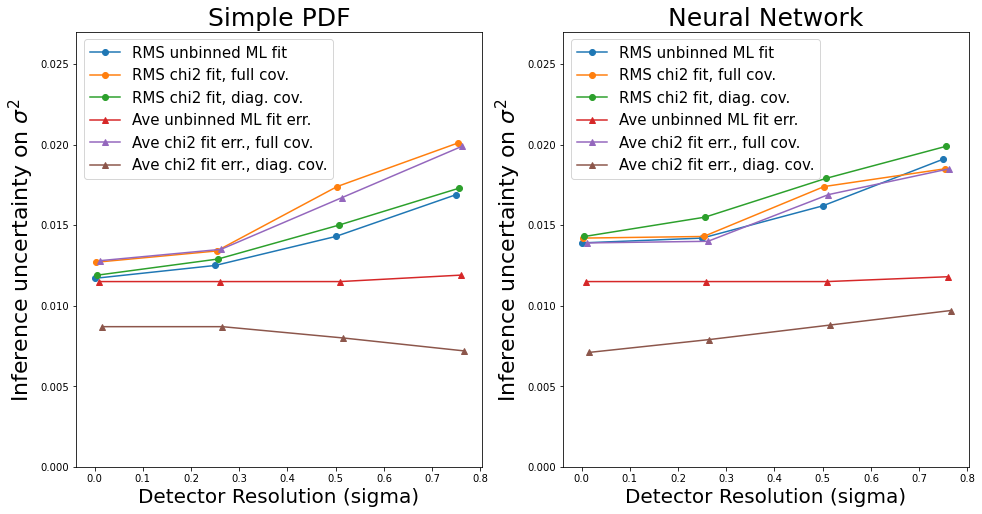

In [48]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))



ufi = 0

axi = ax[0]

for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_sig2[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])


ufi = 1

axi = ax[1]

for ti in range(n_type) :
    rshift = np.zeros( n_res )
    for ri in range( n_res ) :
        rshift[ri] = resolution[ri] + ti*0.003
    axi.plot( rshift, all_err_sig2[:,ti,ufi], marker=marker_styles[ti], label=type_name[ti])


ax[0].set_ylim([0.0,0.027])
ax[1].set_ylim([0.0,0.027])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference uncertainty on $\sigma^2$', fontsize=22)
ax[1].set_ylabel('Inference uncertainty on $\sigma^2$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)


plt.show